In [115]:
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import spacy 

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud


from collections import Counter

nltk.download('words')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('cess_esp')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('universal_tagset')

nlp = spacy.load('es_core_news_sm')

def leer_texto(path_archivo):
    
    """obtiene un string con el texto completro de un archivo

    Returns:
        _string_: 
        string: texto de un archivos
    """

    text = ''
    
    archivo = open(path_archivo, 'r', encoding='utf8')

    while(True):
        linea = archivo.readline()
        text = text+linea
        if not linea:
            break
    
    archivo.close
    
    return text

def depurar_texto(token_texto):
    """A partir de una lista de tokens con cadenas de texto
       crea un nuevo texto solo con aquellos tokens de caracteres
       para ello se aplica la validación isalpha()

    Args:
        token_texto (_list_): lista de tokens con palabras

    Returns:
        string: texto depurado solo con caracteres validos.
    """
    
    texto_depurado = ''
    for palabra in token_texto:
        if palabra.isalpha():
            if len(palabra) > 2:
                texto_depurado = texto_depurado+' '+palabra
    
    return texto_depurado

sns.set_theme(style="white", context="talk")

dark_blue_colors = ['#012a4a', 
                    '#013a63',
                    '#01497c',
                    '#014f86',
                    '#2a6f97',
                    '#2c7da0',
                    '#468faf',
                    '#61a5c2',
                    '#89c2d9',
                    '#a9d6e5']

c_light_blue = ['#0d47a1',
              '#1565c0',
              '#1976d2',
              '#1e88e5',
               '#2196f3']

c_heat_blue = ['#caf0f8',
               '#ade8f4',
               '#90e0ef',
               '#48cae4',
               '#00b4d8',
               '#0096c7',
               '#0077b6',
               '#023e8a',
               '#03045e']

dark_blue=sns.set_palette(sns.color_palette(dark_blue_colors))
light_blue = sns.set_palette(sns.color_palette(c_light_blue))

# Custom Colormap
from matplotlib.colors import LinearSegmentedColormap
cmap_light_blue = ['#0d47a1', '#1976d2', '#2196f3', '#90caf9', '#bbdefb']
ligth_blue_cmap = LinearSegmentedColormap.from_list("mycmap", cmap_light_blue)
dark_blue_cmap = LinearSegmentedColormap.from_list("darkBlue", dark_blue_colors)
blue_heat_map = LinearSegmentedColormap.from_list("darkBlue", c_heat_blue)
    

[nltk_data] Downloading package words to
[nltk_data]     /Users/fredericksalazar/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/fredericksalazar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fredericksalazar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/fredericksalazar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/fredericksalazar/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package cess_esp to
[nltk_data]     /Users/fredericksalazar/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/fredericksalazar/nltk_d

# Limpieza General de datos

se realizará un limpieza general de los archivos a procesar con base en las siguientes reglas definidas:

- todo estará en minusculas
- se reemplazará caracter - por vacio
- se eliman los saltos de linea \n por vacio


In [81]:
path_petro = './archivos/petro_clean.pdf.txt'
path_fajardo = './archivos/fajardo_clean.pdf.txt'
path_rodolfo = './archivos/rodolfo_clean.pdf.txt'
path_federico = './archivos/federico_clean.pdf.txt'

texto_petro = leer_texto(path_petro)
texto_fajardo = leer_texto(path_fajardo)
texto_rodolfo = leer_texto(path_rodolfo)
texto_federico = leer_texto(path_federico)

# Tokenización

Como paso fundamental en el NLP la tokenización nos permite tomar un texto entero y dividirlo en cada una de las palabras que lo componen, esta división permitirá posteriormente entender las palabras usadas.

In [82]:
#hacemos uso del modulo word_tokenize de nltk para separar cada una de las palabras usadas

token_petro = word_tokenize(texto_petro)
token_fajardo = word_tokenize(texto_fajardo)
token_rodolfo = word_tokenize(texto_rodolfo)
token_federico = word_tokenize(texto_federico)

len_token_petro = len(token_petro)
len_token_fajardo = len(token_fajardo)
len_token_rodolfo = len(token_rodolfo)
len_token_federico = len(token_federico)


In [83]:
print('total palabras usadas en documento petro: ', len_token_petro)
print('total palabras usadas en documento fajardo: ', len_token_fajardo)
print('total palabras usadas en documento rodolfo: ', len_token_rodolfo)
print('total palabras usadas en documento federico: ', len_token_federico)

total palabras usadas en documento petro:  28526
total palabras usadas en documento fajardo:  12128
total palabras usadas en documento rodolfo:  35908
total palabras usadas en documento federico:  28080


# Texto Depurado

Se creará un nuevo texto totalmente depurado en el cual se eliminan caracteres especiales, signos de puntuacion, numeros entro otros.

In [84]:

texto_petro_depurado = depurar_texto(token_petro)
texto_fajardo_depurado = depurar_texto(token_fajardo)
texto_rodolfo_depurado = depurar_texto(token_rodolfo)
texto_federico_depurado = depurar_texto(token_federico)

#volvemos a calcular los tokens de cada texto

token_petro = word_tokenize(texto_petro_depurado)
token_fajardo = word_tokenize(texto_fajardo_depurado)
token_rodolfo = word_tokenize(texto_rodolfo)
token_federico = word_tokenize(texto_federico_depurado)

print('total nuevos tokens petro: ', len(token_petro))
print('total nuevos tokens fajardo: ', len(token_fajardo))
print('total nuevos tokens rodolfo: ', len(token_rodolfo))
print('total nuevos tokens federico: ', len(token_federico))


total nuevos tokens petro:  19359
total nuevos tokens fajardo:  8469
total nuevos tokens rodolfo:  35908
total nuevos tokens federico:  18734


In [85]:
#vamos a evidenciar la cantidad total de palabras en cada uno de los textos 

dict_len_textos = {'texto_petro': len_token_petro,
                   'texto_fajardo': len_token_fajardo,
                   'texto_rodolfo': len_token_rodolfo,
                   'texto_federico': len_token_federico}

dict_len_items = dict_len_textos.items()

df_lenght_textos = pd.DataFrame(list(dict_len_items))
df_lenght_textos.columns=['texto', 'total']
df_lenght_textos=df_lenght_textos.sort_values('total', ascending=False)
df_lenght_textos

texto  total
2   texto_rodolfo  35908
0     texto_petro  28526
3  texto_federico  28080
1   texto_fajardo  12128

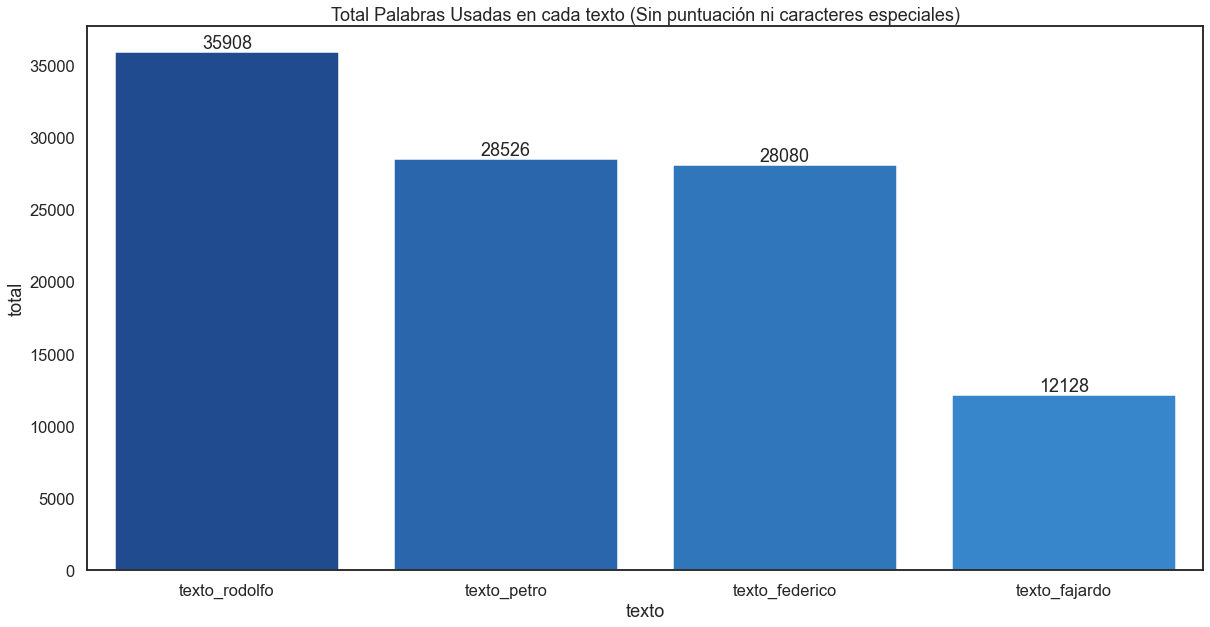

In [86]:
plt.figure(figsize=(20,10))
plt.title('Total Palabras Usadas en cada texto (Sin puntuación ni caracteres especiales)')

ax = sns.barplot(data=df_lenght_textos,
                 x='texto', 
                 y='total',
                 palette=light_blue)

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

# Eliminando Stop Words

Vamos a quitar las stop words que no aportan valor al texto 

In [87]:
es_stop_words = stopwords.words('spanish')

es_stop_words.append('asi')
es_stop_words.append('cada')
es_stop_words.append('debe')
es_stop_words.append('mas')
es_stop_words.append('mayor')
es_stop_words.append('mil')
es_stop_words.append('ser')


In [88]:
#Creamos una lista de palabras eliminando las palabras stop word del español de los textos

lis_palabras_petro_stp = [words for words in token_petro if words not in es_stop_words]
lis_palabras_fajardo_stp = [words for words in token_fajardo if words not in es_stop_words]
lis_palabras_rodolfo_stp = [words for words in token_rodolfo if words not in es_stop_words]
lis_palabras_federico_stp = [words for words in token_federico if words not in es_stop_words]

#obtenemos el tamaño de la lista de palabras 
len_wstp_petro = len(lis_palabras_petro_stp)
len_wstp_fajardo = len(lis_palabras_fajardo_stp)
len_wstp_rodolfo = len(lis_palabras_rodolfo_stp)
len_wstp_federico = len(lis_palabras_federico_stp)

print('total palabras petro sin stopwords: ',len(lis_palabras_petro_stp))
print('total palabras fajardo sin stopwords: ',len(lis_palabras_fajardo_stp))
print('total palabras rodolfo sin stopwords: ',len(lis_palabras_rodolfo_stp))
print('total palabras federico sin stopwords: ',len(lis_palabras_federico_stp))

#se crea diccionario con los resultados
dict_len_wstp_textos = {'texto_petro': len_wstp_petro,
                        'texto_fajardo': len_wstp_fajardo,
                        'texto_rodolfo': len_wstp_rodolfo,
                        'texto_federico': len_wstp_federico}

dict_len_items_wstp = dict_len_wstp_textos.items()

#crea pandas DataFrame con los valores obtenidos
df_lenght_textos_wstp = pd.DataFrame(list(dict_len_items_wstp))
df_lenght_textos_wstp.columns=['texto_wstp', 'total_wstp']

df_lenght_textos_wstp = df_lenght_textos_wstp.sort_values(['total_wstp'], ascending=False)

df_lenght_textos_wstp

total palabras petro sin stopwords:  15094
total palabras fajardo sin stopwords:  6284
total palabras rodolfo sin stopwords:  19668
total palabras federico sin stopwords:  13872


texto_wstp  total_wstp
2   texto_rodolfo       19668
0     texto_petro       15094
3  texto_federico       13872
1   texto_fajardo        6284

In [89]:
#vamos a crear un dataframe total con los datos de total palabras inicicales y total palabras sin stopwords

df_diff_len_textos = df_lenght_textos.merge(df_lenght_textos_wstp, left_on='texto', right_on='texto_wstp', how='inner')
df_diff_len_textos = df_diff_len_textos.drop(['texto_wstp'], axis=1)

df_diff_len_textos['total palabras stopwords'] = (df_diff_len_textos['total']-df_diff_len_textos['total_wstp'])
df_diff_len_textos['% palabras con valor'] = df_diff_len_textos['total_wstp']/df_diff_len_textos['total']*100
df_diff_len_textos['% palabras con stopwords'] = df_diff_len_textos['total palabras stopwords']/df_diff_len_textos['total']*100

df_diff_len_textos.columns =['texto',
                             'total palabras usadas',
                             'total palabras sin stopwords',
                             'total palabras stopwords',
                             '% palabras con valor',
                             '% palabras sin valor']

df_diff_len_textos = df_diff_len_textos.sort_values(['total palabras sin stopwords'], ascending=False)

df_diff_len_textos

texto  total palabras usadas  total palabras sin stopwords  \
0   texto_rodolfo                  35908                         19668   
1     texto_petro                  28526                         15094   
2  texto_federico                  28080                         13872   
3   texto_fajardo                  12128                          6284   

   total palabras stopwords  % palabras con valor  % palabras sin valor  
0                     16240             54.773310             45.226690  
1                     13432             52.913132             47.086868  
2                     14208             49.401709             50.598291  
3                      5844             51.813984             48.186016

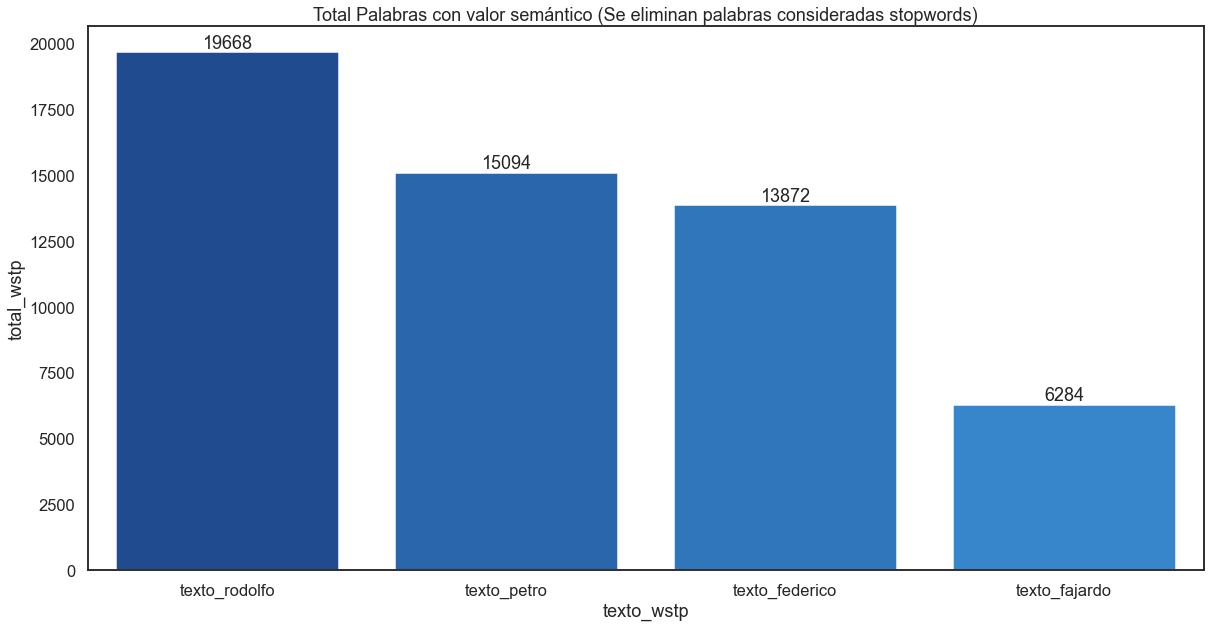

In [90]:
plt.figure(figsize=(20,10))
plt.title('Total Palabras con valor semántico por texto (Se eliminan palabras consideradas stopwords)')

ax = sns.barplot(data=df_lenght_textos_wstp,
                 x='texto_wstp', 
                 y='total_wstp',
                 palette=light_blue)

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

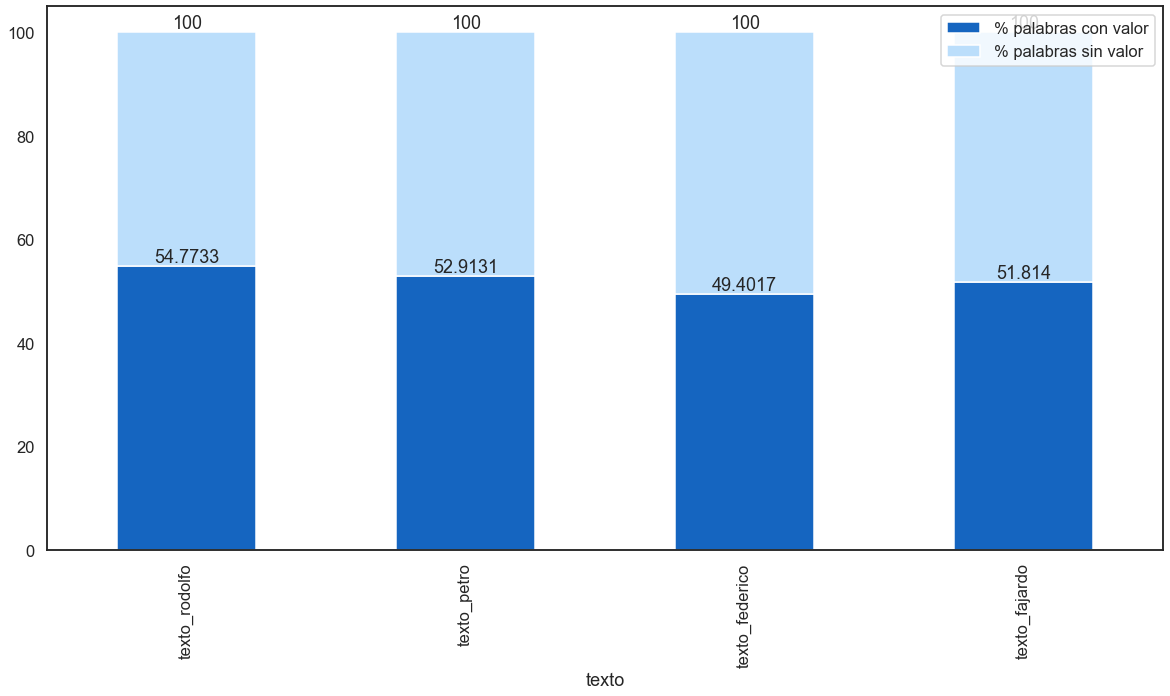

In [120]:
#cremos un grafico que muestre la distribucion de palabras en cada texto 

stck_bar_plot = df_diff_len_textos.plot.bar(x='texto',
                                            y=['% palabras con valor', '% palabras sin valor'],
                                            stacked = True,
                                            figsize=(20,10),
                                            color=["#1565c0", "#bbdefb"])

for i in stck_bar_plot.containers:
    stck_bar_plot.bar_label(i,)
    



# etiquetado de palabras y lematización

El POS Tag nos permite etiquetar una palabra según sea su naturaleza, asi podremos comprender mejor la composición de un documento en verbos, adjetivos, nombres, pronombres, adverbios etc. este proceso es fundamental para reducir y mejorar el conteo de palabras usando la tecnica de lematización que nos permitirá encontrar la palabra origen de palabras usadas en diferentes tiempos o formas: ej casas, casa = casa | 

para este proceso usaremos la libreria SpaCy

Listado de POS_tag 

- ADJ -> Adjetivo
- ADP -> Adposicion
- ADV -> Adverbio
- AUX -> Auxiliar
- DET -> Determinador
- INTJ -> Interjección
- NOUN -> Sustantivo
- NUM -> Numeral
- PART -> Particula
- PRON -> Pronombre
- PROPN -> Nombre propio
- PUNCT -> Puntuación
- VERB -> Verbo

In [92]:
#cargamos nuestro texto depurado a nlp para generar un Doc Spacy

lis_lema_petro = []
lis_lema_fajardo = []
lis_lema_rodolfo = []
lis_lema_federico = []

tag_petro = []
tag_fajardo = []
tag_rodolfo = []
tag_federico = []

sp_doc_petro = nlp(depurar_texto(lis_palabras_petro_stp))
sp_doc_fajardo = nlp(depurar_texto(lis_palabras_fajardo_stp))
sp_doc_rodolfo = nlp(depurar_texto(lis_palabras_rodolfo_stp))
sp_doc_federico = nlp(depurar_texto(lis_palabras_federico_stp))

#se crea una matrix con las palabras, su postag y su lemma para el texto de petro
for token in sp_doc_petro:
    tag_petro.append([token.text, token.pos_, token.lemma_, ])
    
#Se crea una matrix con las palabras su postag y su lemma para el texto de fajardo

for token in sp_doc_fajardo:
    tag_fajardo.append([token.text, token.pos_, token.lemma_, ])
    
for token in sp_doc_rodolfo:
    tag_rodolfo.append([token.text, token.pos_, token.lemma_, ])
    
for token in sp_doc_federico:
    tag_federico.append([token.text, token.pos_, token.lemma_, ])


In [93]:
#Procedemos a crear una lista con las palabras lematizadas de cada texto, nos permitirá construir nuestro bag of words.

for row in tag_petro:
    lis_lema_petro.append(row[2])
    
for row in tag_fajardo:
    lis_lema_fajardo.append(row[2])
    
for row in tag_rodolfo:
    lis_lema_rodolfo.append(row[2])
    
for row in tag_federico:
    lis_lema_federico.append(row[2])
    


In [94]:
#Se crea un vector de frecuencias con el conteo de las palabras lematizadas

cnt_palabras_petro = Counter(lis_lema_petro)
cnt_palabras_fajardo = Counter(lis_lema_fajardo)
cnt_palabras_rodolfo = Counter(lis_lema_rodolfo)
cnt_palabras_federico = Counter(lis_lema_federico)


# Identificación de Entidades NER

vamos a intentar aplicar una técnica de NER (Named Entity Recognition) lo que permitirá identificar entidades dentro de nuestros vectores, asi nos daremos una idea de que organizaciones menciona cada autor.

In [95]:
lis_ent_petro = []
lis_ent_fajardo = []
lis_ent_rodolfo = []
lis_ent_federico = []

for ent in sp_doc_petro.ents:
    lis_ent_petro.append([ent.text, ent.label_])
    
for ent in sp_doc_fajardo.ents:
    lis_ent_fajardo.append([ent.text, ent.label_])
    
for ent in sp_doc_rodolfo.ents:
    lis_ent_rodolfo.append([ent.text, ent.label_])
    
for ent in sp_doc_federico.ents:
    lis_ent_federico.append([ent.text, ent.label_])

# Análisis de palabras (WordCloud)

Se procede a crear una nube de palabras con las listas de palabras lematizadas de cada texto, esto nos permite validar cuales son las palabras mas usadas en cada texto, identificar posibles anomalías y en caso de ser necesario mejorar el pre procesamiento y limpieza de los datos.

(-0.5, 599.5, 599.5, -0.5)

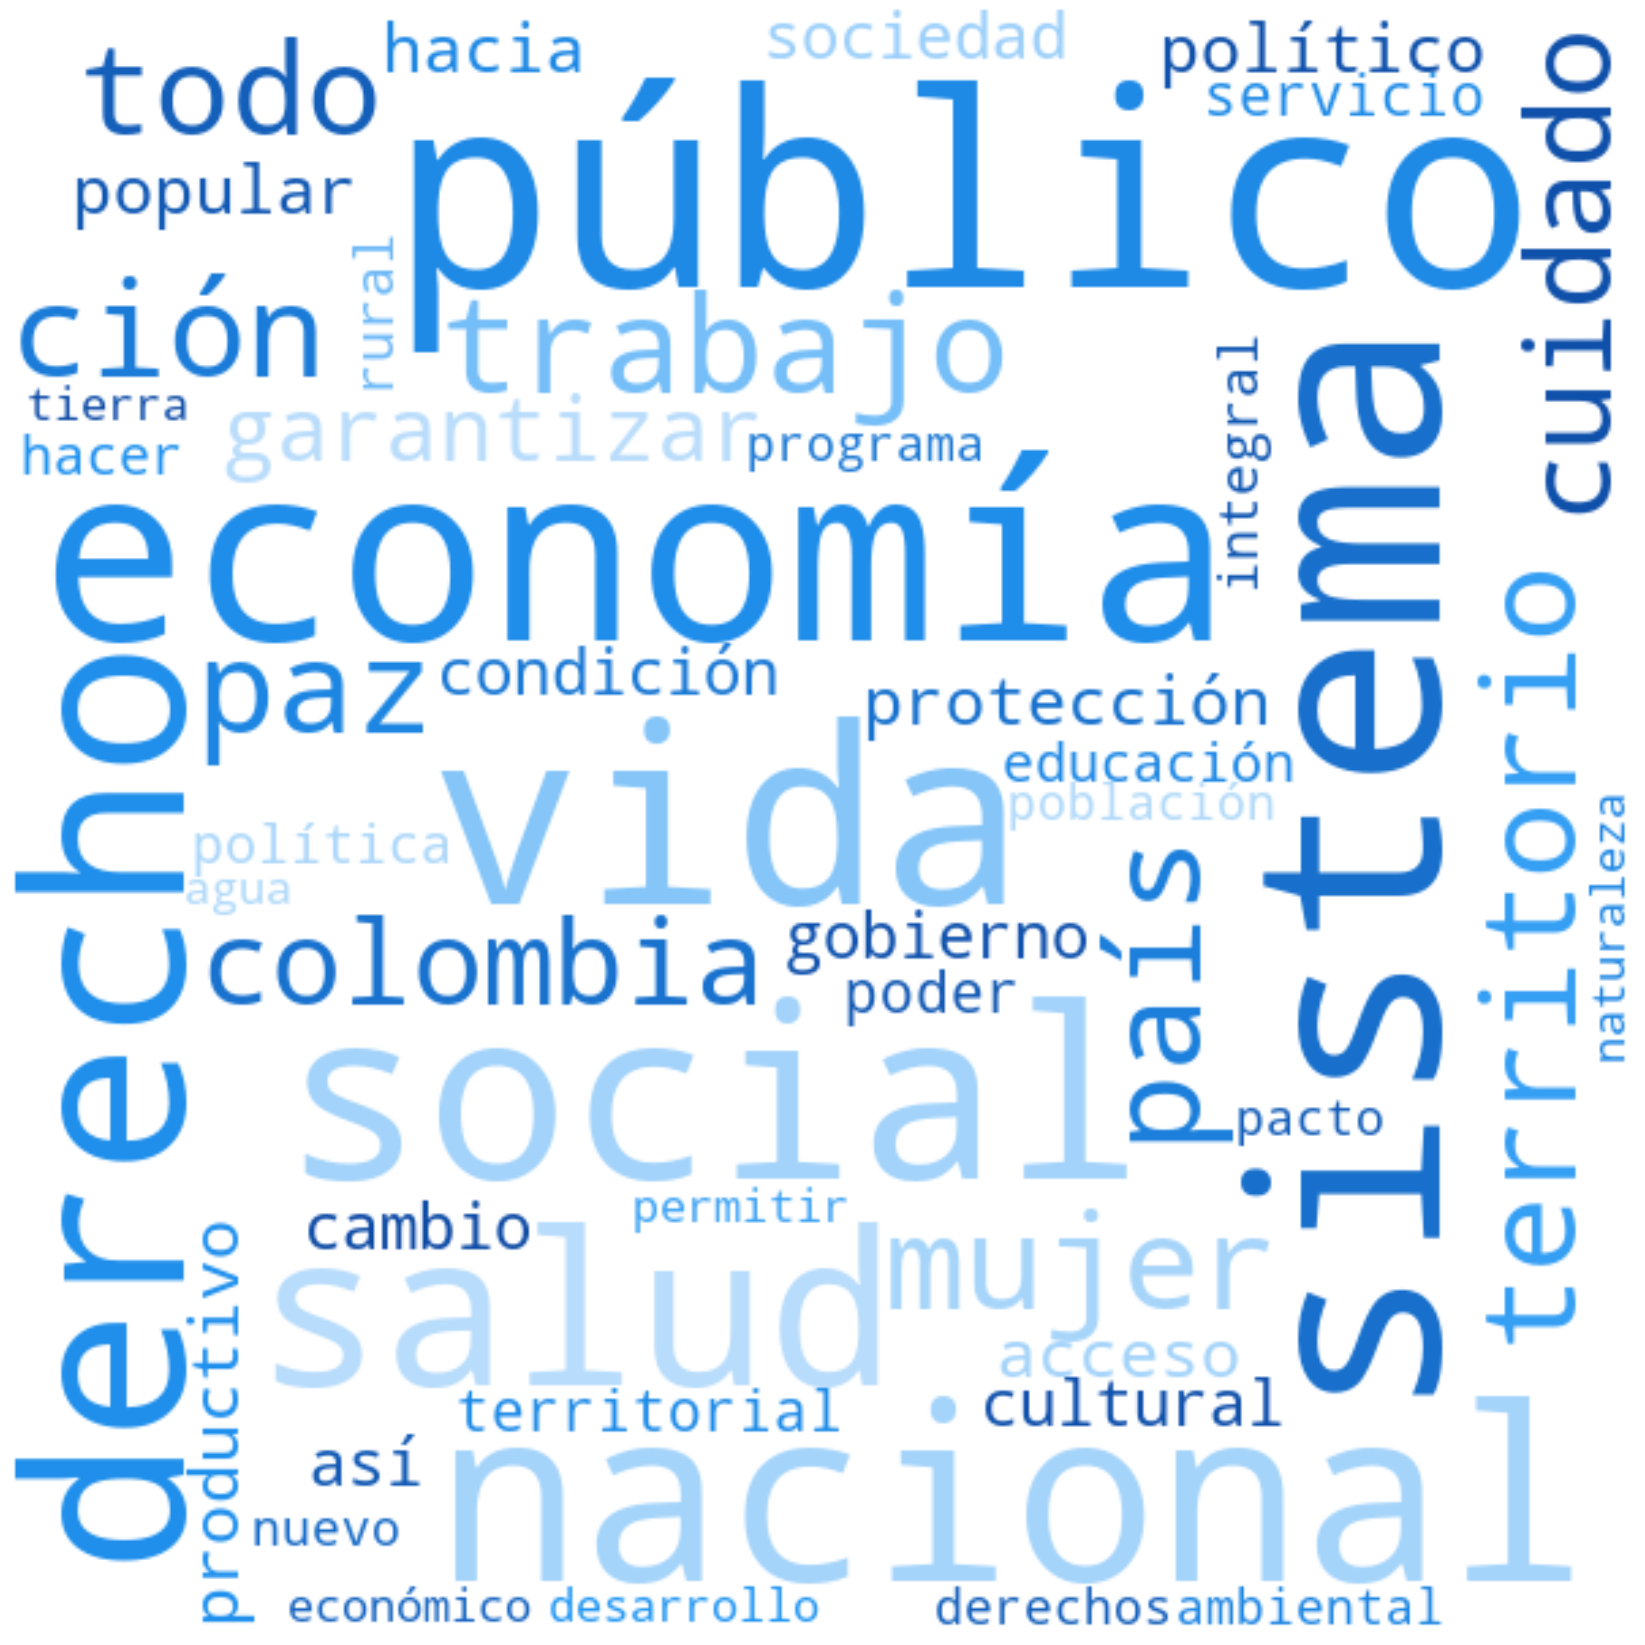

In [96]:
#Se crea una wordCloud con las palabras de la lista de conteo lematizada del texto de petro

wrdCloud = WordCloud(width=600,
                     height=600,
                     max_font_size=100,
                     max_words=50,
                     background_color='white',
                     colormap=ligth_blue_cmap).generate_from_frequencies(cnt_palabras_petro)

plt.figure(figsize=(30,30))
plt.imshow(wrdCloud, interpolation='bilinear')
plt.axis('off')

(-0.5, 599.5, 599.5, -0.5)

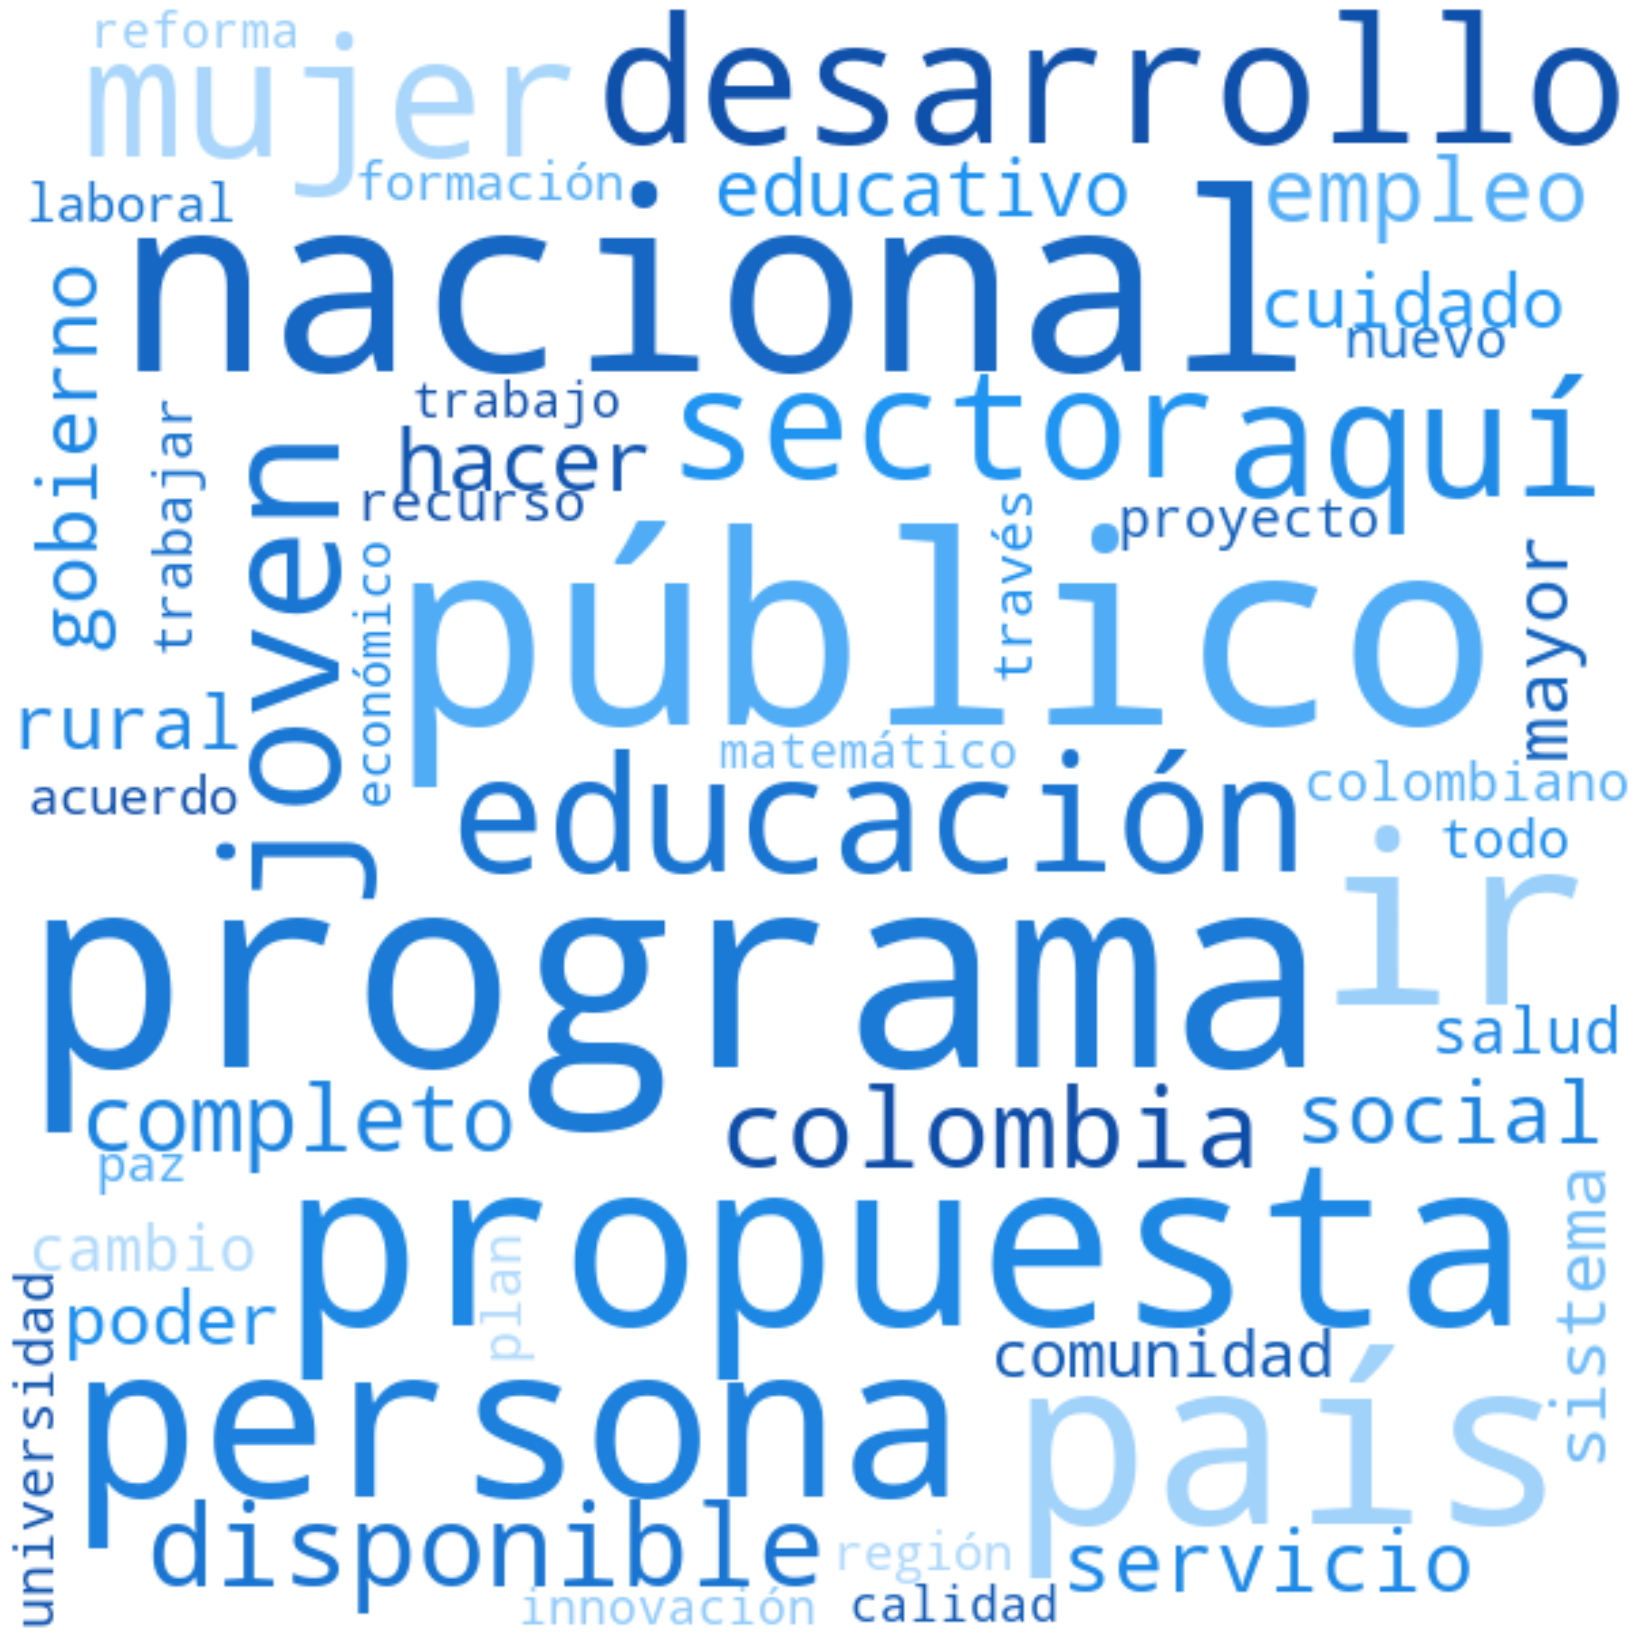

In [97]:
#Se crea una wordCloud con las palabras de la lista de conteo lematizada del texto de fajardo

wrdCloud = WordCloud(width=600,
                     height=600,
                     max_font_size=100,
                     max_words=50,
                     background_color='white',
                     colormap=ligth_blue_cmap).generate_from_frequencies(cnt_palabras_fajardo)

plt.figure(figsize=(30,30))
plt.imshow(wrdCloud, interpolation='bilinear')
plt.axis('off')

(-0.5, 599.5, 599.5, -0.5)

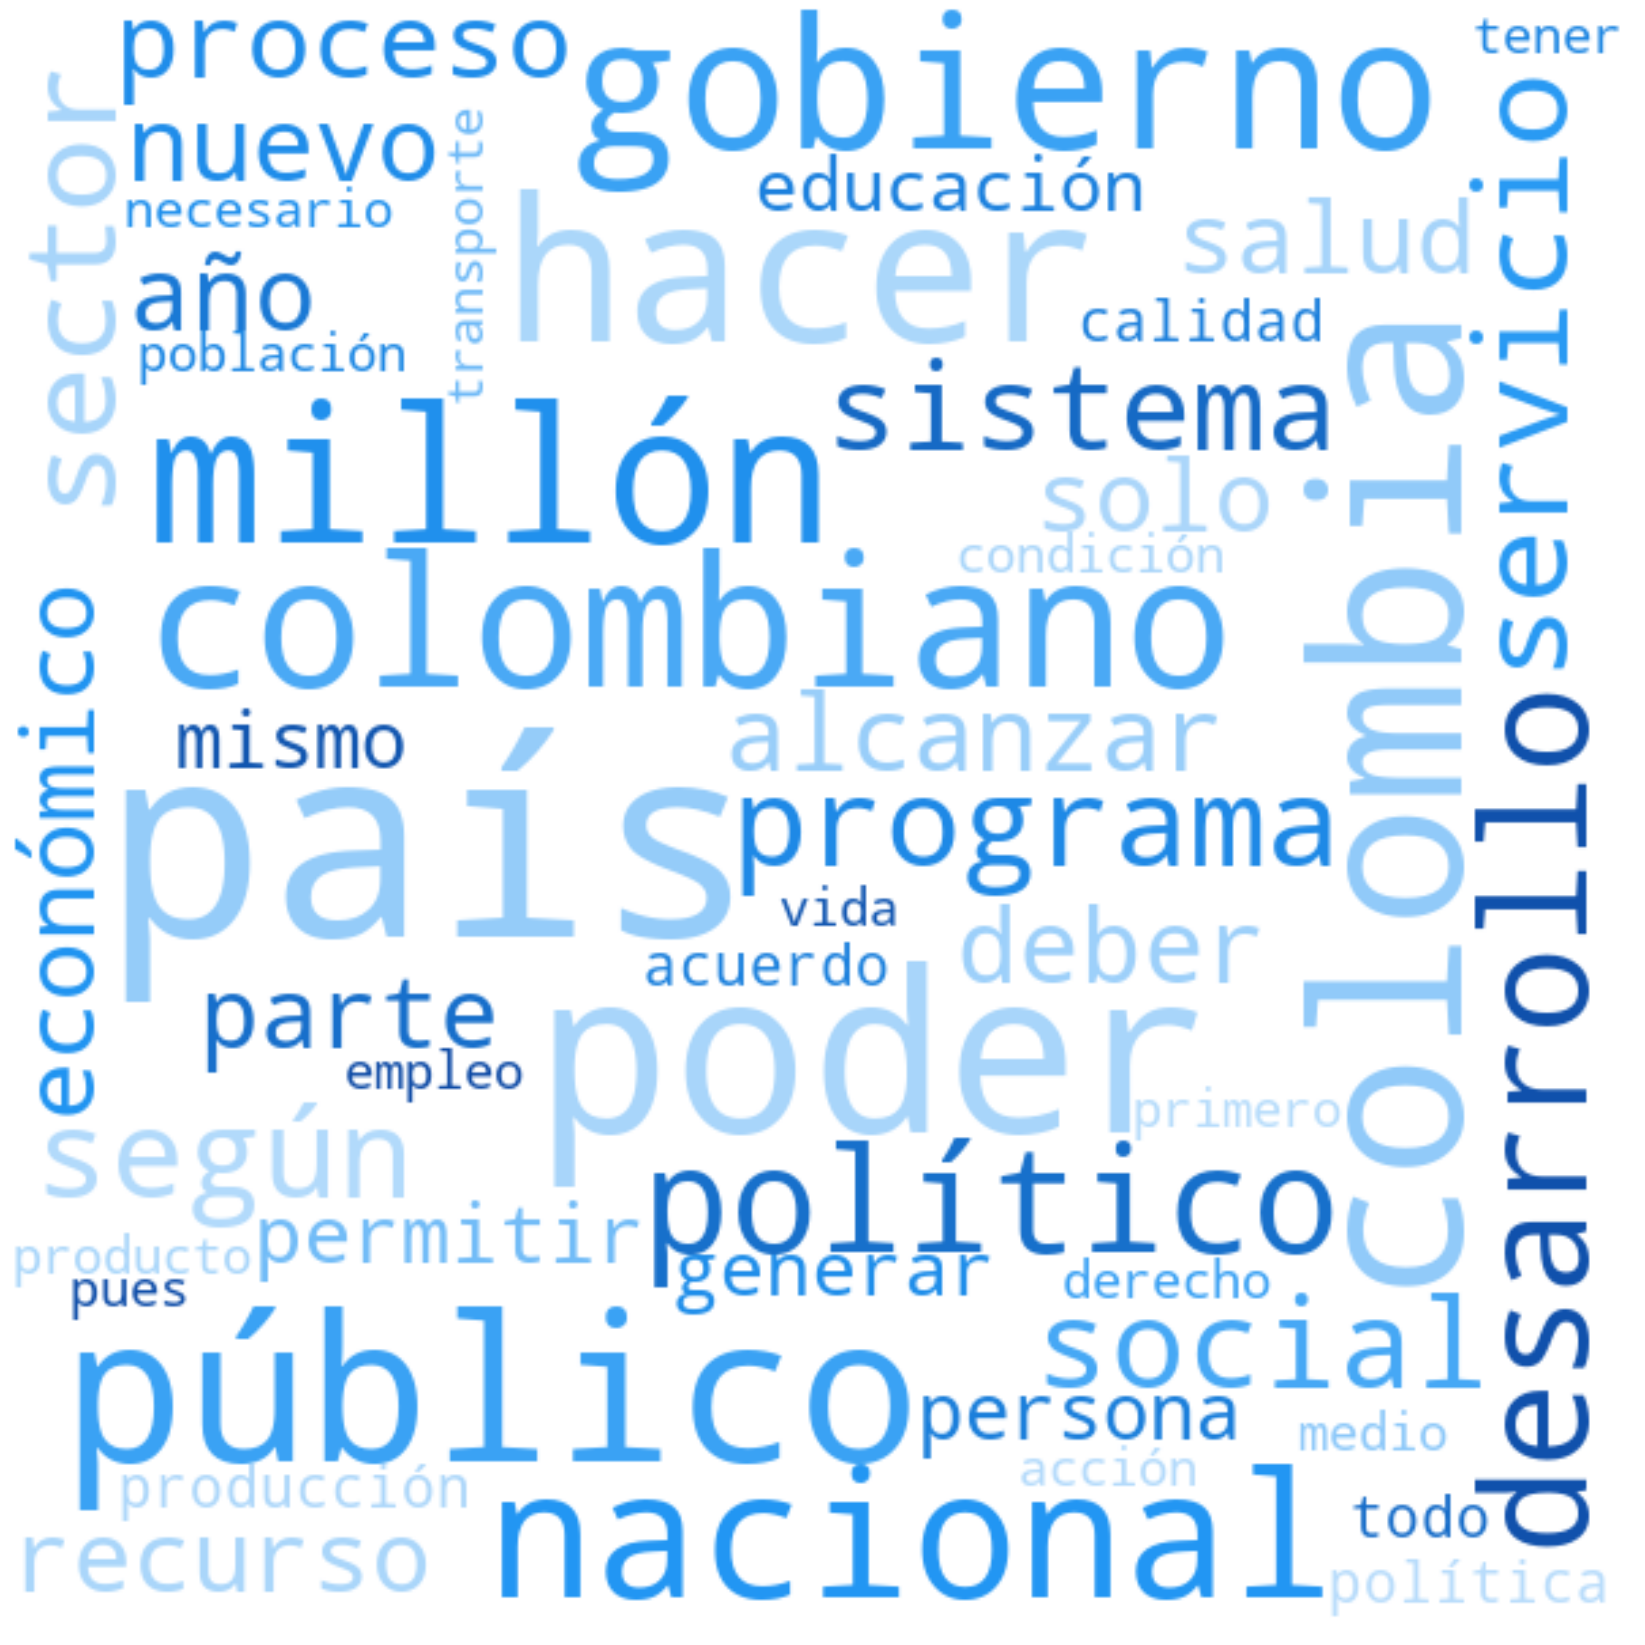

In [98]:
wrdCloud = WordCloud(width=600,
                     height=600,
                     max_font_size=100,
                     max_words=50,
                     background_color='white',
                     colormap=ligth_blue_cmap).generate_from_frequencies(cnt_palabras_rodolfo)

plt.figure(figsize=(30,30))
plt.imshow(wrdCloud, interpolation='bilinear')
plt.axis('off')

(-0.5, 599.5, 599.5, -0.5)

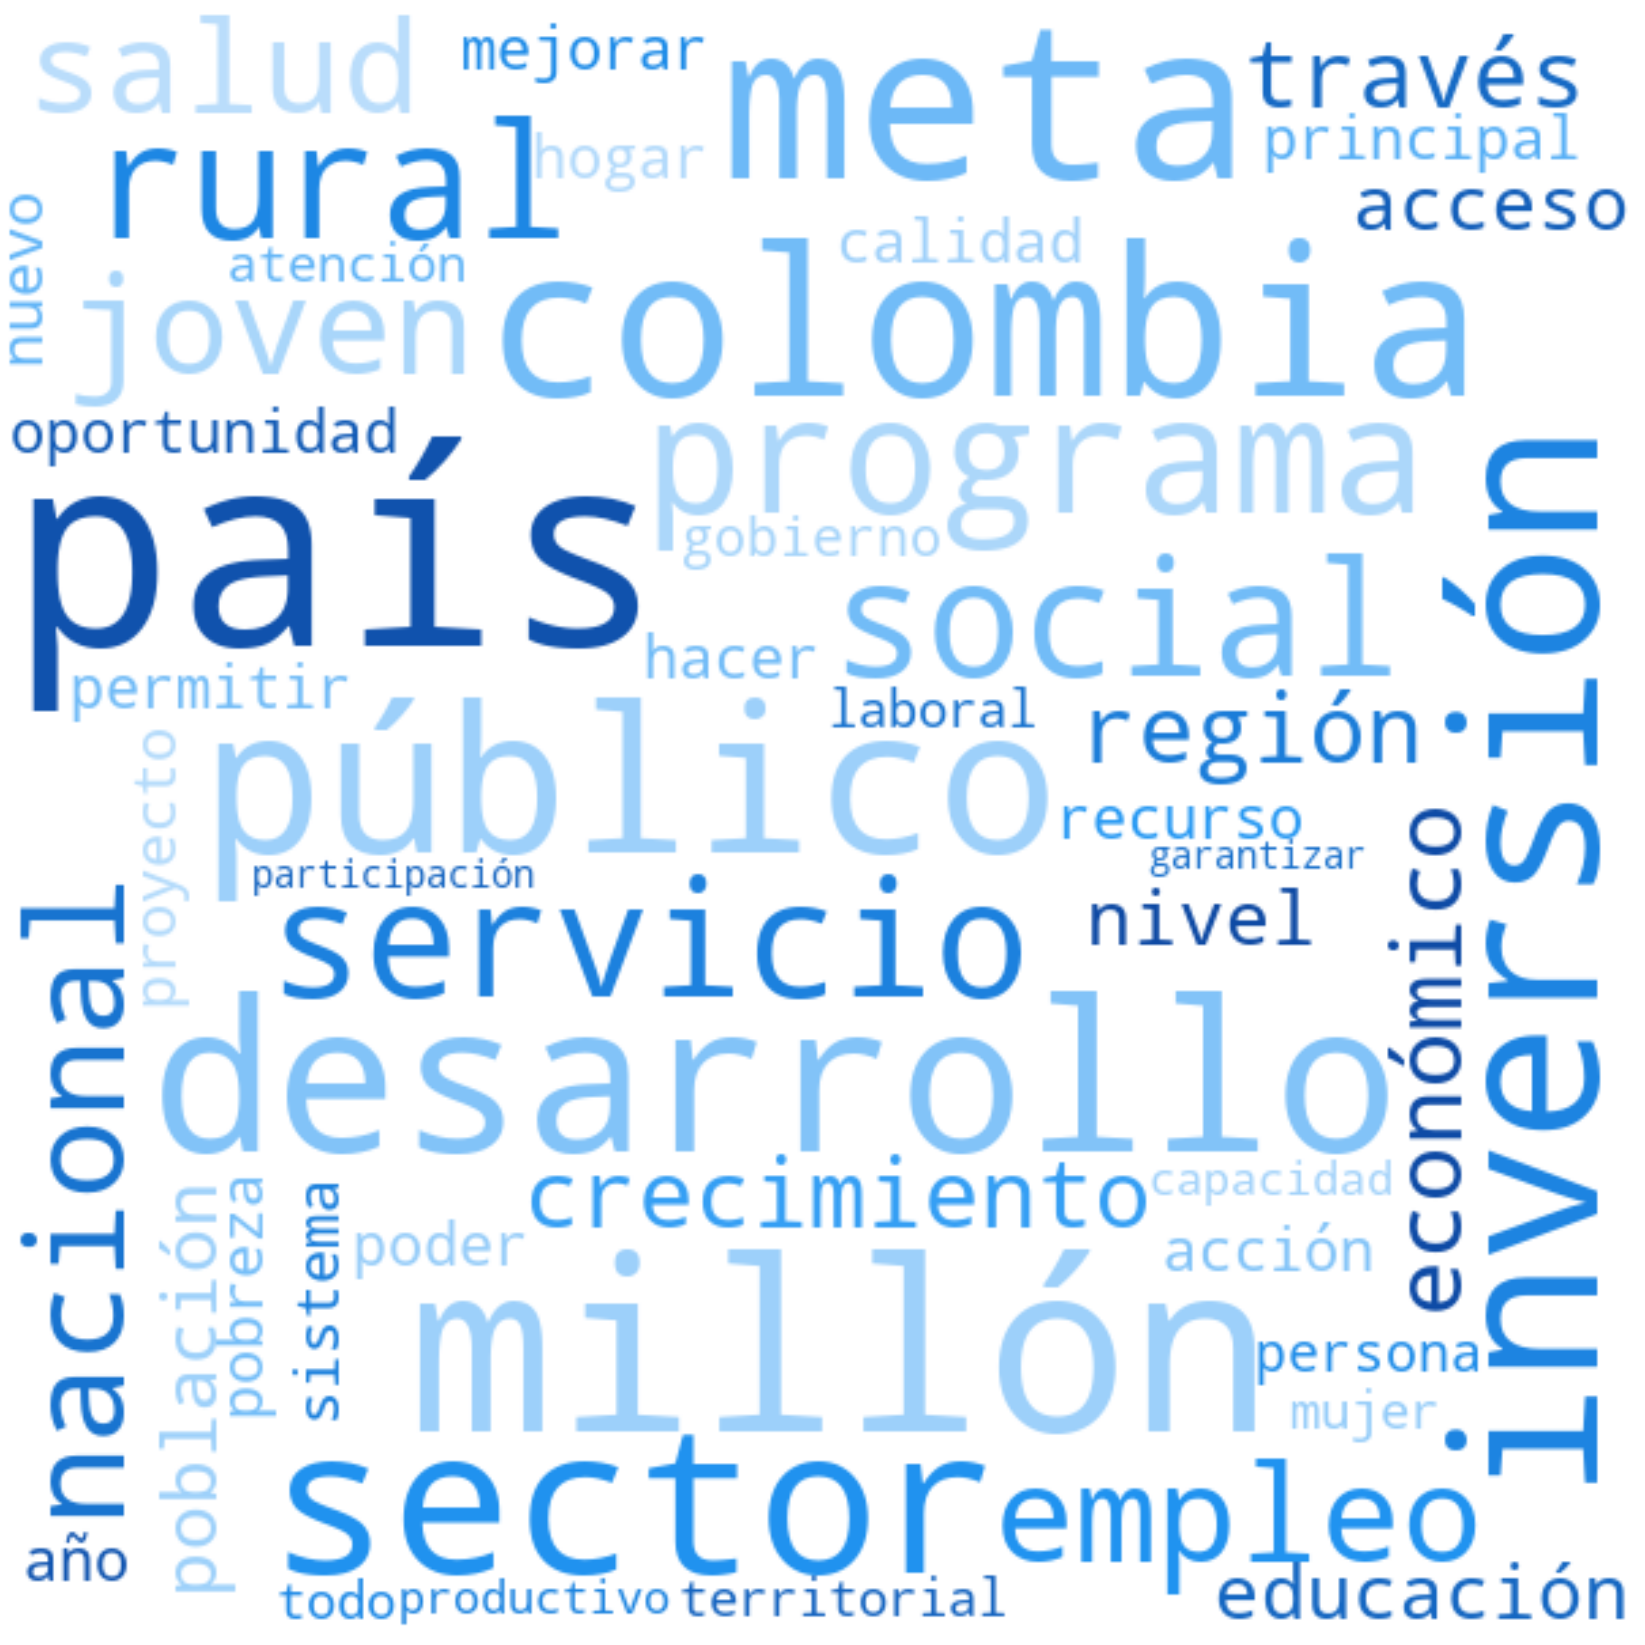

In [121]:
wrdCloud = WordCloud(width=600,
                     height=600,
                     max_font_size=100,
                     max_words=50,
                     background_color='white',
                     colormap=ligth_blue_cmap).generate_from_frequencies(cnt_palabras_federico)

plt.figure(figsize=(30,30))
plt.imshow(wrdCloud, interpolation='bilinear')
plt.axis('off')

# Implementación Bag Of Words 

se implementa bag of words con la matriz de documentos totales a fin de identificar el uso de las palabras mas frecuentes en cada uno de los planes de gobierno.

In [100]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [101]:
#Creamos el corpus de nuestro proceso
corpus =[texto_petro_depurado,
         texto_fajardo_depurado,
         texto_rodolfo_depurado,
         texto_federico_depurado]

In [102]:
es_stop_words

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [103]:
#crea el count vectorizer

count_vectorizer = CountVectorizer(analyzer='word',
                                   decode_error='ignore',
                                   encoding='str',
                                   lowercase=True,
                                   stop_words=es_stop_words,
                                   strip_accents='ascii',
                                   min_df=3,
                                   max_features=40)

In [104]:
data_vectorized = count_vectorizer.fit_transform(corpus)

/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['eramos', 'estabamos', 'estais', 'estan', 'estara', 'estaran', 'estaras', 'estare', 'estareis', 'estaria', 'estariais', 'estariamos', 'estarian', 'estarias', 'esteis', 'esten', 'estes', 'estuvieramos', 'estuviesemos', 'fueramos', 'fuesemos', 'habeis', 'habia', 'habiais', 'habiamos', 'habian', 'habias', 'habra', 'habran', 'habras', 'habre', 'habreis', 'habria', 'habriais', 'habriamos', 'habrian', 'habrias', 'hayais', 'hubieramos', 'hubiesemos', 'mia', 'mias', 'mio', 'mios', 'seais', 'sera', 'seran', 'seras', 'sere', 'sereis', 'seria', 'seriais', 'seriamos', 'serian', 'serias', 'si', 'tambien', 'tendra', 'tendran', 'tendras', 'tendre', 'tendreis', 'tendria', 'tendriais', 'tendriamos', 'tendrian', 'tendrias', 'teneis', 'tengais', 'tenia', 'teniais', 'teniamos', 'tenian', 'tenias', 'tuvieramos

In [105]:
data_dtm = pd.DataFrame(data_vectorized.toarray(), columns=count_vectorizer.get_feature_names())

/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [106]:
data_dtm

acceso  atencion  calidad  colombia  condiciones  derechos  desarrollo  \
0      52        24       29        61           43        68          34   
1      11        14       16        33            6        16          38   
2      28        26       46       116           32        19          71   
3      45        38       45        79           27        23          74   

   economia  educacion  empleo  ...  sector  seguridad  sera  servicios  \
0        87         40      29  ...      22         21    54         30   
1         4         33      18  ...      25         13    10         18   
2        17         46      32  ...      56         31    17         43   
3        17         49      46  ...      49         33    20         45   

   sistema  social  todas  trabajo  traves  vida  
0       92      63     32       59      31   108  
1       22      16     17       14      19    14  
2       52      52     22       35      38    40  
3       38      45     27       21      51    30  

[4 rows x 40 columns]

In [1]:

plt.figure(figsize=(18,18))
sns.heatmap(data_dtm.transpose(),
            annot=True,
            cmap='Blues', 
            fmt="d")

NameError: name 'plt' is not defined

In [126]:
cnt_palabras_federico.most_common(20)

[('país', 130),
 ('millón', 99),
 ('meta', 83),
 ('desarrollo', 74),
 ('colombia', 73),
 ('público', 72),
 ('sector', 72),
 ('inversión', 71),
 ('programa', 67),
 ('servicio', 65),
 ('rural', 65),
 ('social', 64),
 ('empleo', 61),
 ('joven', 60),
 ('nacional', 59),
 ('salud', 54),
 ('crecimiento', 52),
 ('económico', 52),
 ('través', 51),
 ('región', 50)]